In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np

In [2]:
from sklearn.decomposition import TruncatedSVD

In [3]:
amazon_ratings=pd.read_csv("ratings_Beauty.csv")

In [4]:
amazon_ratings.head(10)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [5]:
import seaborn as sns

In [6]:
amazon_ratings.describe(include='all')

,UserId,ProductId,Rating,Timestamp
count,2023070,2023070,2.023070e+06,2.023070e+06
unique,1210271,249274,NaN,NaN
top,A3KEZLJ59C1JVH,B001MA0QY2,NaN,NaN
freq,389,7533,NaN,NaN
mean,NaN,NaN,4.149036e+00,1.360389e+09
std,NaN,NaN,1.311505e+00,4.611860e+07
min,NaN,NaN,1.000000e+00,9.087552e+08
25%,NaN,NaN,4.000000e+00,1.350259e+09
50%,NaN,NaN,5.000000e+00,1.372810e+09
75%,NaN,NaN,5.000000e+00,1.391472e+09


In [7]:
amazon_ratings.corr()

,Rating,Timestamp
Rating,1.000000,0.000335
Timestamp,0.000335,1.000000


# Recommendation System Part-1
### Product popularity(Content) based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

<AxesSubplot:xlabel='Rating', ylabel='count'>

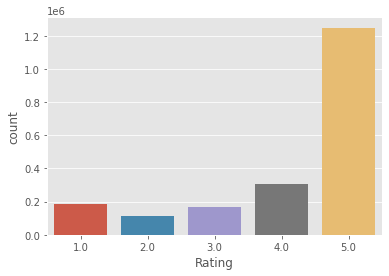

In [8]:
sns.countplot(x=amazon_ratings['Rating'])

In [9]:
amazon_ratings.ProductId.nunique()

249274

In [10]:
amazon_ratings.Rating.unique()

array([5., 3., 4., 1., 2.])

In [11]:
amazon_ratings.Rating.value_counts()

5.0    1248721
4.0     307740
1.0     183784
3.0     169791
2.0     113034
Name: Rating, dtype: int64

In [12]:
amazon_ratings.ProductId.value_counts().max()

7533

In [13]:
amazon_ratings=amazon_ratings.dropna()

In [14]:
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [15]:
amazon_ratings.shape

(2023070, 4)

In [16]:
popular_products=pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())

In [17]:
popular_products.sort_values(by='Rating',ascending=False)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
...,...
B004U81OBC,1
B004U7R0EI,1
B004U7Q2O2,1


In [18]:
most_popular=popular_products.sort_values(by='Rating',ascending=False)

In [19]:
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


In [20]:
most_popular.shape

(249274, 1)

<AxesSubplot:xlabel='ProductId'>

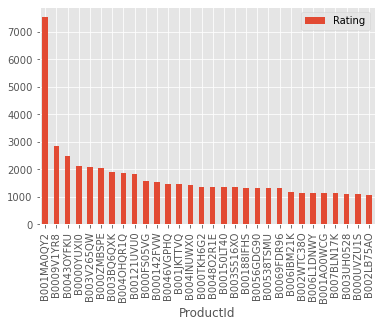

In [21]:
most_popular.head(30).plot(kind='bar')

# Recommendation System Part-2
### Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought similar items
A Recommendation System which recommends the products to a customer who purchased a particular product. Recommended products are sorted according to the ratings provided by other users who also bought that particular product. The most correlated products are selected based on their average_ratings from all the users. And finally the top 10 correlated products are recommended based on the rating patterns of all the users.

In [22]:
amazon_ratings1=amazon_ratings.head(10000)

In [23]:
amazon_ratings1

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


In [24]:
amazon_ratings1.head(20)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
5,AKJHHD5VEH7VG,0762451459,5.0,1404518400
6,A1BG8QW55XHN6U,1304139212,5.0,1371945600
7,A22VW0P4VZHDE3,1304139220,5.0,1373068800
8,A3V3RE4132GKRO,130414089X,5.0,1401840000
9,A327B0I7CYTEJC,130414643X,4.0,1389052800


In [25]:
amazon_ratings1[amazon_ratings1.duplicated(['ProductId'])]

,UserId,ProductId,Rating,Timestamp
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
10,A1BG8QW55XHN6U,130414643X,5.0,1372032000
11,AIFAAVTUYHEHB,130414643X,4.0,1378252800
15,A6R426V4J7AOM,1304168522,5.0,1373414400
17,AKGB62WGF35J8,1304174778,5.0,1372896000
...,...,...,...,...
9995,A9V4K2YJ2DWTQ,B000052YQ2,3.0,1396396800
9996,A3033CXHQ0NF8J,B000052YQ2,5.0,1291248000
9997,A1Z66KHEXSF3L5,B000052YQ2,3.0,1361577600
9998,A1Y7D2DRVBN59D,B000052YQ2,5.0,1402099200


In [26]:
amazon_ratings1[amazon_ratings1.duplicated(['UserId'])]

,UserId,ProductId,Rating,Timestamp
10,A1BG8QW55XHN6U,130414643X,5.0,1372032000
13,A22VW0P4VZHDE3,130414674X,5.0,1371686400
14,AVOGV98AYOFG2,1304168522,5.0,1372118400
16,A22VW0P4VZHDE3,1304174778,5.0,1372896000
18,A22VW0P4VZHDE3,1304174867,5.0,1373068800
...,...,...,...,...
9938,A38JIIHRVTSNYV,B000052YQ2,5.0,1373328000
9960,A1LY5B3TEA9DJV,B000052YQ2,5.0,1387238400
9972,ANAQ4KOA7B32R,B000052YQ2,5.0,1401321600
9978,A21U4DR8M6I9QN,B000052YQ2,5.0,1396224000


<AxesSubplot:>

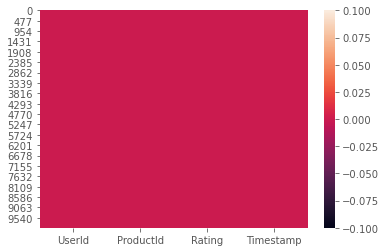

In [27]:
sns.heatmap(amazon_ratings1.isnull())

In [28]:
print("Number of Unique Products in Amazon full data :",amazon_ratings['ProductId'].nunique())
print("Number of Unique Users in Amazon full data :",amazon_ratings['UserId'].nunique())
print("Number of Unique Products in Subset data 10000 of Amazon :",amazon_ratings1['ProductId'].nunique())
print("Number of Unique Users in Subset data 10000 of Amazon :",amazon_ratings1['UserId'].nunique())

Number of Unique Products in Amazon full data : 249274
Number of Unique Users in Amazon full data : 1210271
Number of Unique Products in Subset data 10000 of Amazon : 886
Number of Unique Users in Subset data 10000 of Amazon : 9697


# Creating the Pivot table between "UserId" and "ProductId" and values as Ratings

In [29]:
ratings_matrix=amazon_ratings1.pivot_table(index='UserId',columns='ProductId',values='Rating',fill_value=0)

In [30]:
ratings_matrix.head(10)

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A059547920Q3LZVFHLPI3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A07410232KYRFR25CIUGJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A082796624UNM47DSAI6K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
ratings_matrix.shape

(9697, 886)

In [32]:
ratings_matrix.index

Index(['A00205921JHJK5X9LNP42', 'A024581134CV80ZBLIZTZ',
       'A03056581JJIOL5FSKJY7', 'A03099101ZRK4K607JVHH',
       'A0505229A7NSH3FRXRR4', 'A05492663T95KW63BR75K',
       'A059547920Q3LZVFHLPI3', 'A07410232KYRFR25CIUGJ',
       'A082796624UNM47DSAI6K', 'A0864963DOAY7LXGS5I6',
       ...
       'AZW1HXXYAC15B', 'AZWRTJPN7NXT', 'AZWTXHXZXFAYP', 'AZYQEFB9Y5N22',
       'AZZHB6U54UDYW', 'AZZHJZP4GQPPZ', 'AZZNK89PXD006', 'AZZOFVMQC0BJG',
       'AZZQXL8VDCFTV', 'AZZTJQ7CQZUD8'],
      dtype='object', name='UserId', length=9697)

## Doing the Transpose of  "ratings_matrix" and storing it into "ratings_matrix_t"

In [33]:
ratings_matrix_t=ratings_matrix.T

In [34]:
ratings_matrix_t.shape

(886, 9697)

In [35]:
ratings_matrix_t.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
ratings_matrix_t.index

Index(['0205616461', '0558925278', '0733001998', '0737104473', '0762451459',
       '1304139212', '1304139220', '130414089X', '130414643X', '1304146537',
       ...
       'B000052YPE', 'B000052YPF', 'B000052YPG', 'B000052YPH', 'B000052YPM',
       'B000052YPU', 'B000052YPV', 'B000052YPY', 'B000052YQ0', 'B000052YQ2'],
      dtype='object', name='ProductId', length=886)

# Taking the backup of "ratings_matrix_t" into "ratings_matrix_t1"

In [37]:
ratings_matrix_t1=ratings_matrix_t

## Decomposing the Matrix from 9697 columns into 10 columns using SVD algorithm

In [38]:
SVD=TruncatedSVD(n_components=10)
decomposed_matrix=SVD.fit_transform(ratings_matrix_t)

In [39]:
decomposed_matrix.shape

(886, 10)

In [40]:
decomposed_matrix

array([[ 2.27082853e-15, -3.98568650e-14, -1.00892394e-13, ...,
         1.19151711e-12, -1.96529056e-13, -1.14367078e-11],
       [ 1.10068559e-14, -3.06228279e-13, -3.14237169e-13, ...,
         3.58916599e-12, -1.91836580e-12, -2.64101915e-11],
       [-9.16646232e-17,  1.61658523e-15,  1.57908008e-15, ...,
        -1.09300119e-14,  2.39600251e-15,  2.75324087e-13],
       ...,
       [ 3.07484911e-06,  2.27946620e-01, -1.04122048e-02, ...,
        -3.69924483e-03,  4.01569698e-05, -4.89840516e-02],
       [ 1.64849566e-06,  8.34926459e-04, -1.22947413e-05, ...,
        -2.93591338e-04,  2.77936711e-04, -1.03024043e-02],
       [ 2.06824352e-04,  4.20598532e-01,  3.55711262e-01, ...,
        -2.52681135e-02, -2.55781005e-02,  7.88811940e-01]])

In [41]:
df_decomposed_matrix=pd.DataFrame(decomposed_matrix)

In [42]:
df_decomposed_matrix.head()

,0,1,2,3,4,5,6,7,8,9
0,2.270829e-15,-3.985687e-14,-1.008924e-13,-2.034955e-13,-6.565851e-14,4.677375e-13,3.880529e-13,1.191517e-12,-1.965291e-13,-1.143671e-11
1,1.100686e-14,-3.062283e-13,-3.142372e-13,-5.285125e-13,-6.549979e-13,5.925479e-12,5.769573e-12,3.589166e-12,-1.918366e-12,-2.641019e-11
2,-9.166462e-17,1.616585e-15,1.579080e-15,1.066170e-14,8.752255e-15,-5.507908e-14,-5.775060e-14,-1.093001e-14,2.396003e-15,2.753241e-13
3,1.100890e-23,-1.665100e-22,-9.253463e-23,3.180698e-22,-1.157091e-22,1.962908e-22,2.071639e-22,1.201856e-21,5.580956e-21,-1.484977e-20
4,2.561703e-15,1.856263e-14,2.684206e-14,-2.731687e-14,2.973802e-14,-2.181743e-13,-3.435939e-13,2.435137e-13,-8.660342e-14,-5.645377e-12


In [43]:
correlation_matrix=np.corrcoef(decomposed_matrix)

In [44]:
correlation_matrix

array([[ 1.        ,  0.97198882, -0.97316896, ...,  0.28213645,
         0.95018233, -0.38689343],
       [ 0.97198882,  1.        , -0.99373707, ...,  0.2312267 ,
         0.94504574, -0.20477934],
       [-0.97316896, -0.99373707,  1.        , ..., -0.24860913,
        -0.96283057,  0.20313295],
       ...,
       [ 0.28213645,  0.2312267 , -0.24860913, ...,  1.        ,
         0.33155247, -0.02336229],
       [ 0.95018233,  0.94504574, -0.96283057, ...,  0.33155247,
         1.        , -0.17225786],
       [-0.38689343, -0.20477934,  0.20313295, ..., -0.02336229,
        -0.17225786,  1.        ]])

In [45]:
correlation_matrix.shape

(886, 886)

In [46]:
df_correlation=pd.DataFrame(correlation_matrix)

In [47]:
df_correlation.head()

,0,1,2,3,4,5,6,7,8,9,...,876,877,878,879,880,881,882,883,884,885
0,1.000000,0.971989,-0.973169,0.933240,0.991554,0.974014,0.961639,0.983869,0.974036,0.988420,...,-0.951705,0.972463,-0.942946,0.980034,0.991529,-0.945818,0.823686,0.282136,0.950182,-0.386893
1,0.971989,1.000000,-0.993737,0.867977,0.936335,0.899236,0.890377,0.965069,0.899248,0.941630,...,-0.910287,0.947187,-0.875851,0.932065,0.965185,-0.942365,0.803125,0.231227,0.945046,-0.204779
2,-0.973169,-0.993737,1.000000,-0.896548,-0.943596,-0.915488,-0.914457,-0.956622,-0.915474,-0.949045,...,0.902363,-0.942374,0.910827,-0.950519,-0.963140,0.926976,-0.838076,-0.248609,-0.962831,0.203133
3,0.933240,0.867977,-0.896548,1.000000,0.939359,0.972292,0.989675,0.858875,0.972220,0.916754,...,-0.821270,0.840473,-0.964729,0.934726,0.889680,-0.778745,0.752910,0.226961,0.893920,-0.500576
4,0.991554,0.936335,-0.943596,0.939359,1.000000,0.989931,0.975050,0.976821,0.989962,0.996603,...,-0.962444,0.971676,-0.963898,0.990054,0.987144,-0.937230,0.839578,0.311215,0.935147,-0.458207


In [48]:
ratings_matrix_t.index[99]

'6117036094'

In [49]:
i='6117036094'

In [50]:
product_names=list(ratings_matrix_t.index)

In [51]:
product_names

['0205616461',
 '0558925278',
 '0733001998',
 '0737104473',
 '0762451459',
 '1304139212',
 '1304139220',
 '130414089X',
 '130414643X',
 '1304146537',
 '130414674X',
 '1304168522',
 '1304174778',
 '1304174867',
 '1304174905',
 '1304196046',
 '1304196062',
 '1304196070',
 '1304196135',
 '1304351475',
 '1304482596',
 '1304482634',
 '1304482685',
 '1304488608',
 '1304495396',
 '1304511073',
 '1304511081',
 '1304511111',
 '130451112X',
 '1304511138',
 '1304511146',
 '1304511154',
 '1304622193',
 '1304622223',
 '1304622428',
 '1304622452',
 '1304622460',
 '1304622622',
 '1304622657',
 '1304622665',
 '1304624498',
 '1304624544',
 '1304651029',
 '1304651088',
 '130465110X',
 '1304651118',
 '1304651347',
 '1304665704',
 '1304665720',
 '130466578X',
 '1403790965',
 '1412759676',
 '1451646526',
 '1457982633',
 '1572671203',
 '1879187396',
 '1906987238',
 '1929099886',
 '1987958179',
 '3222000565',
 '322700075X',
 '3227001055',
 '3227001381',
 '3292000971',
 '3423470476',
 '360211600X',
 '40573627

In [52]:
product_ID=product_names.index(i)

In [53]:
product_ID

99

In [54]:
correlation_product_ID=correlation_matrix[product_ID]

In [55]:
correlation_product_ID.shape

(886,)

In [56]:
correlation_product_ID

array([ 0.94878432,  0.93663729, -0.91517345,  0.78011492,  0.94075951,
        0.88625585,  0.8462163 ,  0.987306  ,  0.88636873,  0.95456927,
        0.8462163 ,  0.9536617 ,  0.84529312,  0.87751517,  0.88625585,
        0.8462163 ,  0.8462163 , -0.9676431 ,  0.84529305,  0.92653797,
        0.94852449,  0.94928925,  0.8434074 ,  0.95349869,  0.94890505,
        0.77758375,  0.7745648 ,  0.87832933,  0.95349869,  0.7836607 ,
        0.78482674,  0.88618845,  0.83151717,  0.77774813,  0.95362223,
        0.88625585,  0.77774813, -0.95779079,  0.88647316,  0.87804   ,
        0.87804989,  0.77758375,  0.88621621,  0.88625585,  0.88625585,
        0.88625585,  0.95349869,  0.88625585,  0.88634518,  0.87804   ,
       -0.13191705,  0.60894301,  0.85632588,  0.98642193,  0.31397348,
       -0.92002683,  0.92390981, -0.77306979, -0.94966516,  0.81645363,
        0.78390704,  0.95452902,  0.91047711,  0.7774155 ,  0.83483246,
        0.94363822, -0.99192478, -0.96422156,  0.99281171,  0.98

In [57]:
recommend_list=list(ratings_matrix_t.index[correlation_product_ID>0.98])

In [58]:
len(recommend_list)

31

In [69]:
recommend_list.remove(i)

# Here is the recommendation List of Top Correlated products

In [59]:
recommend_list

['130414089X',
 '1457982633',
 '4057362886',
 '4057362894',
 '4057368825',
 '5357955867',
 '6117036094',
 '6175005570',
 '9788073328',
 '9788074286',
 '9788078907',
 '9789820615',
 '9790773609',
 '979077365X',
 '9790775156',
 '9790775989',
 '9790776489',
 '9790787049',
 '9790789513',
 '9790789831',
 '9790790961',
 '9790791526',
 '9790792824',
 '9790793782',
 '9790794223',
 'B00001ZTKL',
 'B000024Z42',
 'B00004TMOK',
 'B000052XZQ',
 'B000052YL0',
 'B000052YPF']

In [66]:
recommend_list[0]

'130414089X'

In [67]:
product_names.index(recommend_list[0])

7

## Here we can see the correlation value of first product in the "recommend_list"

In [68]:
correlation_product_ID[product_names.index(recommend_list[0])]

0.9873060033370409